## Photo Caption

**Objective: Generate the caption for the given photograph.**

Steps:
  * Use VGG pre-trained model.
  * [Keras Documentation](https://keras.io/applications/#vgg16)

In [105]:
import numpy as np

In [106]:
from keras.applications.vgg16 import VGG16

In [107]:
model = VGG16()

In [108]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [109]:
from keras.utils import plot_model

In [110]:
plot_model(model, to_file='vgg.png')

In [111]:
#?plot_model

<img src='./vgg.png'></img>

## Load and Prepare image

[Keras Image Preprocessing Documentation](https://github.com/keras-team/keras/blob/master/keras/preprocessing/image.py)

In [112]:
from keras.preprocessing.image import load_img

In [113]:
image = load_img('./coffee_mug.jpg', target_size=(224,224))

In [114]:
# convert the image into NumPy array
from keras.preprocessing.image import img_to_array

In [115]:
image_arr = img_to_array(image)

In [116]:
image_arr.shape

(224, 224, 3)

In [117]:
type(image_arr)

numpy.ndarray

In [118]:
# VGG network expects the input as 4 dimensions, num of images, rows, columns, channels.
# so reshape it.

new_image = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))

In [119]:
#?image_arr.reshape

In [120]:
type(new_image)

numpy.ndarray

In [121]:
new_image.shape

(1, 224, 224, 3)

## Preprocess input

In [122]:
from keras.applications.vgg16 import preprocess_input

In [123]:
new_image = preprocess_input(new_image)

In [124]:
type(new_image)

numpy.ndarray

In [125]:
new_image.shape

(1, 224, 224, 3)

## Predict

The VGG16 network classifies the image into 1000 classes.

In [126]:
pred = model.predict(new_image)

In [127]:
pred.shape

(1, 1000)

In [128]:
type(pred)

numpy.ndarray

## Interpret Prediction

In [129]:
# VGG16 provides decode_predictions method
from keras.applications.vgg16 import decode_predictions

In [130]:
# convert probabilities into labels
label = decode_predictions(pred)

In [131]:
type(label)

list

In [132]:
len(label)

1

In [133]:
label

[[(u'n03063599', u'coffee_mug', 0.9372429),
  (u'n07930864', u'cup', 0.05219177),
  (u'n04579145', u'whiskey_jug', 0.0069142496),
  (u'n07920052', u'espresso', 0.0013977916),
  (u'n03063689', u'coffeepot', 0.00042941113)]]

In [134]:
# print top3 predictions
def print_decoded_prediction_info(label):
    for i in range(3):
        entry = label[0][i]
        print('%15s %.2f%%' % (entry[1], entry[2]))

In [135]:
#import cv2

In [136]:
import matplotlib.pyplot as plt

In [137]:
%matplotlib inline

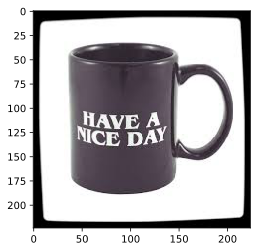

In [138]:
plt.imshow(image)

In [139]:
image_arr.shape

(224, 224, 3)

In [140]:
#image_arr

In [141]:
print_decoded_prediction_info(label)

     coffee_mug 0.94%
            cup 0.05%
    whiskey_jug 0.01%


In [142]:
from os import listdir

In [143]:
all_files = listdir('.')

In [144]:
all_files

['.ipynb_checkpoints',
 'apples.jpg',
 'coffee_mug.jpg',
 'DisplayImageFiles.ipynb',
 'fruit_col.jpg',
 'gandhi.jpg',
 'PhotoCaption.ipynb',
 'sundar_pichai.jpg',
 'vgg.png']

In [145]:
def list_dir_files(directory, extension):
    return( f for f in listdir(directory) if f.endswith('.' + extension))

In [146]:
image_files_iter = list_dir_files('.', 'jpg')

In [147]:
print(image_files_iter)

<generator object <genexpr> at 0x1c1551baf0>


In [148]:
image_files = list()

In [149]:
for file in image_files_iter:
    print file
    image_files.append(file)

apples.jpg
coffee_mug.jpg
fruit_col.jpg
gandhi.jpg
sundar_pichai.jpg


In [150]:
len(image_files)

5

In [151]:
image_files

['apples.jpg',
 'coffee_mug.jpg',
 'fruit_col.jpg',
 'gandhi.jpg',
 'sundar_pichai.jpg']

In [152]:
def read_image_files(file_names):
    img_list = list()
    for file in file_names:
        img = load_img(file, target_size=(224,224))
        # convert to array
        img_arr = img_to_array(img)
        # reshape or expand dim for VGG network, row wise - axis=0
        img_arr = np.expand_dims(img_arr, axis=0)
        img_arr = preprocess_input(img_arr)
        img_list.append(img_arr)
    img_list = np.concatenate(img_list, axis=0)
    return img_list

In [153]:
img_list = read_image_files(image_files)

In [154]:
np.shape(img_list)

(5, 224, 224, 3)

In [155]:
def print_top3_prediction_info(label):
    for i in range(3):
        entry = label[0][i]
        print('%15s %.2f%%' % (entry[1], entry[2]))
    
def do_image_prediction(img_arr):
    pred = model.predict(img_arr)
    label = decode_predictions(pred)
    print_top3_prediction_info(label)

In [156]:
#%config InlineBackend.figure_format = 'svg'

#import matplotlib as mpl
#mpl.rc("savefig", dpi=dpi)

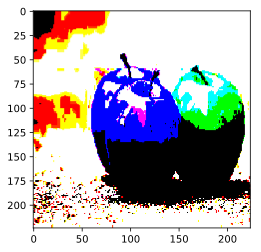

            hip 0.34%
   Granny_Smith 0.32%
    bell_pepper 0.12%


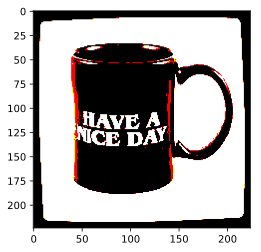

     coffee_mug 0.94%
            cup 0.05%
    whiskey_jug 0.01%


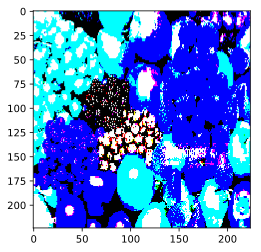

     strawberry 0.37%
      pineapple 0.15%
  grocery_store 0.09%


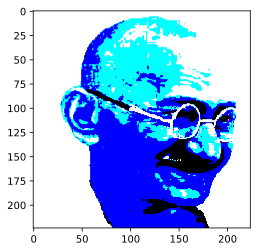

       lab_coat 0.49%
    stethoscope 0.05%
     shower_cap 0.04%


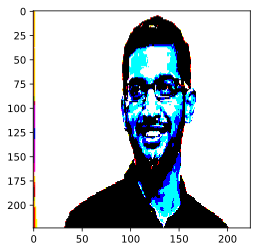

           suit 0.20%
         jersey 0.07%
           oboe 0.04%


In [157]:
for img in img_list:
    #plt.imshow(img)
    new_image = img.reshape((1, img.shape[0], img.shape[1], img.shape[2]))
    # convert image to float
    #x = np.asarray(img, dtype= np.float64())
    #plt.imshow(x)
    #plt.imshow(img/255.)
    #print(img)
    #plt.imshow(np.float64(img))
    plt.imshow(img)
    plt.show()
    do_image_prediction(new_image)
    #plt.show()